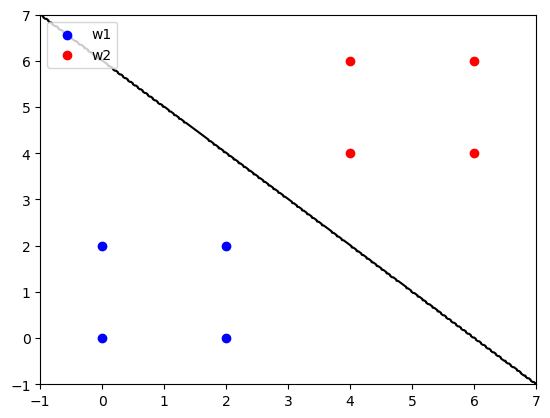

In [2]:
import numpy as np
import matplotlib.pyplot as plt

w1 = np.array([[0, 0], [2, 0], [2, 2], [0, 2]])
w2 = np.array([[4, 4], [6, 4], [6, 6], [4, 6]])

# 计算均值向量
mu1 = np.mean(w1, axis=0)
mu2 = np.mean(w2, axis=0)

# 假设两类具有相同的协方差矩阵
# 计算协方差矩阵
cov_matrix = (np.cov(w1, rowvar=False) + np.cov(w2, rowvar=False)) / 2

# 计算协方差矩阵的逆
inv_cov_matrix = np.linalg.inv(cov_matrix)

def bayesian_classifier(x):
    # 计算贝叶斯判别函数
    g1 = np.dot(np.dot((x - mu1), inv_cov_matrix), (x - mu1).T)
    g2 = np.dot(np.dot((x - mu2), inv_cov_matrix), (x - mu2).T)
    
    # 返回分类结果
    return 'w1' if g1 < g2 else 'w2'

# 绘制判别界面和数据点
x = np.linspace(-1, 7, 400)
y = np.linspace(-1, 7, 400)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: 1 if bayesian_classifier(np.array([x, y])) == 'w1' else 0)(X, Y)

plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='w1')
plt.scatter(w2[:, 0], w2[:, 1], color='red', label='w2')
plt.contour(X, Y, Z, levels=[0.5], colors='black')  # 判别界面
plt.legend()
plt.show()